In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

#Basics
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from pandas_profiling import ProfileReport

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler, OrdinalEncoder
from sklearn.impute import SimpleImputer, KNNImputer

# Pipeline
from sklearn.compose import ColumnTransformer

# Classifiers
from sklearn.neighbors import KNeighborsClassifier, LocalOutlierFactor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, RandomForestClassifier, GradientBoostingClassifier, VotingClassifier, AdaBoostClassifier
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeClassifier 
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, Lasso, ElasticNet
from lightgbm import LGBMRegressor, LGBMClassifier


# Evaluation
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, cross_validate, StratifiedKFold



import warnings
# Warnings
from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter("ignore", category=ConvergenceWarning)


%matplotlib inline
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


This notebook inspired by https://www.kaggle.com/code/yunusserhat/spaceship-titanic-base-model-ml-fonksiyonlar, https://www.kaggle.com/code/pniaz20/spaceship-titanic-v001 

Thaks to them for sharing their work.

In [2]:
# Get Dataframe
train_org = pd.read_csv("/kaggle/input/spaceship-titanic/train.csv", index_col = "PassengerId")
test_org = pd.read_csv("/kaggle/input/spaceship-titanic/test.csv", index_col = "PassengerId")

In [3]:
# First Look at train data
display(train_org.head(3), train_org.info(), train_org.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 8693 entries, 0001_01 to 9280_02
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8492 non-null   object 
 1   CryoSleep     8476 non-null   object 
 2   Cabin         8494 non-null   object 
 3   Destination   8511 non-null   object 
 4   Age           8514 non-null   float64
 5   VIP           8490 non-null   object 
 6   RoomService   8512 non-null   float64
 7   FoodCourt     8510 non-null   float64
 8   ShoppingMall  8485 non-null   float64
 9   Spa           8510 non-null   float64
 10  VRDeck        8505 non-null   float64
 11  Name          8493 non-null   object 
 12  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(6)
memory usage: 891.4+ KB


,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
PassengerId,,,,,,,,,,,,,
0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False


None

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [4]:
# First Look at test data
display(test_org.head(3), test_org.info(), test_org.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 4277 entries, 0013_01 to 9277_01
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    4190 non-null   object 
 1   CryoSleep     4184 non-null   object 
 2   Cabin         4177 non-null   object 
 3   Destination   4185 non-null   object 
 4   Age           4186 non-null   float64
 5   VIP           4184 non-null   object 
 6   RoomService   4195 non-null   float64
 7   FoodCourt     4171 non-null   float64
 8   ShoppingMall  4179 non-null   float64
 9   Spa           4176 non-null   float64
 10  VRDeck        4197 non-null   float64
 11  Name          4183 non-null   object 
dtypes: float64(6), object(6)
memory usage: 434.4+ KB


,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
PassengerId,,,,,,,,,,,,
0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus


None

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,4186.000000,4195.000000,4171.000000,4179.000000,4176.000000,4197.000000
mean,28.658146,219.266269,439.484296,177.295525,303.052443,310.710031
std,14.179072,607.011289,1527.663045,560.821123,1117.186015,1246.994742
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,53.000000,78.000000,33.000000,50.000000,36.000000
max,79.000000,11567.000000,25273.000000,8292.000000,19844.000000,22272.000000


In [5]:
# Check for missing values
train_org.isna().sum()

HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [6]:
# Check missing values in test data
test_org.isna().sum()

HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [7]:
#  Seperate Categorical and Numerical Variables
def grab_col_names(dataframe, cat_th=10, car_th=20, print_results = False): 
    """

    Veri setindeki kategorik, numerik ve kategorik fakat kardinal değişkenlerin isimlerini verir.
    Not: Kategorik değişkenlerin içerisine numerik görünümlü kategorik değişkenler de dahildir.

    Parameters
    ------
        dataframe: dataframe
                Değişken isimleri alınmak istenilen dataframe
        cat_th: int, optional
                numerik fakat kategorik olan değişkenler için sınıf eşik değeri
        car_th: int, optinal
                kategorik fakat kardinal değişkenler için sınıf eşik değeri

    Returns
    ------
        cat_cols: list
                Kategorik değişken listesi
        num_cols: list
                numerik değişken listesi
        cat_but_car: list
                Kategorik görünümlü kardinal değişken listesi

    Examples
    ------
        import seaborn as sns
        df = sns.load_dataset("iris")
        print(grab_col_names(df))


    Notes
    ------
        cat_cols + num_cols + cat_but_car = toplam değişken sayısı
        num_but_cat cat_cols'un içerisinde.
        Return olan 3 liste toplamı toplam değişken sayısına eşittir: cat_cols + num_cols + cat_but_car = değişken sayısı

    """

    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]
    
    if print_results == True:
        print(f"Observations: {dataframe.shape[0]}")
        print(f"Variables: {dataframe.shape[1]}")
        print(f'cat_cols: {len(cat_cols)}')
        print(f'num_cols: {len(num_cols)}')
        print(f'cat_but_car: {len(cat_but_car)}')
        print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, num_cols, cat_but_car

In [8]:
# Apply function
cat_cols, num_cols, cat_but_car = grab_col_names(train_org, print_results=True)

Observations: 8693
Variables: 13
cat_cols: 5
num_cols: 6
cat_but_car: 2
num_but_cat: 1


## Get to know Categorical Variables

In [9]:
def cat_summary(dataframe):
    for col_name in cat_cols:
        print("############## Unique Observations of Categorical Data ###############")
        print("The unique number of "+ col_name+": "+ str(dataframe[col_name].nunique())+"\n")

        print("############## Frequency of Categorical Data ########################")
        print(pd.DataFrame({col_name : dataframe[col_name].value_counts(),
                            "Ratio": dataframe[col_name].value_counts()/len(dataframe)}))
        #if plot == True:
        plt.figure(figsize=(10,6))
        rgb_values = sns.color_palette("Set2", 6)
        sns.set_theme(style="darkgrid")
        ax = sns.countplot(data=dataframe, x=col_name, palette=rgb_values)
        for p in ax.patches:
            percentage = str(f"{(100*p.get_height()/len(dataframe)):.2f}") + "%"
            ax.annotate(f"\n{percentage}", (p.get_x()+0.4, p.get_height()+100), ha = "center", color = "black", fontsize = 16)
            ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=16)
        plt.show()

############## Unique Observations of Categorical Data ###############
The unique number of HomePlanet: 3

############## Frequency of Categorical Data ########################
        HomePlanet     Ratio
Earth         4602  0.529391
Europa        2131  0.245140
Mars          1759  0.202347


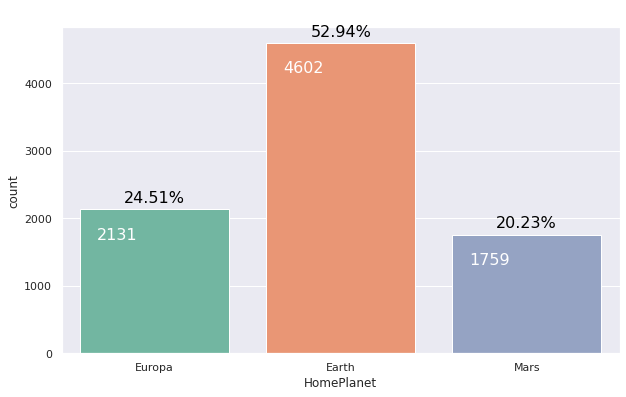

############## Unique Observations of Categorical Data ###############
The unique number of CryoSleep: 2

############## Frequency of Categorical Data ########################
       CryoSleep     Ratio
False       5439  0.625676
True        3037  0.349362


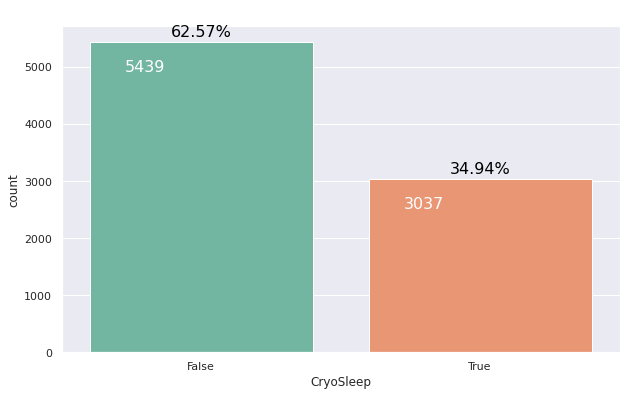

############## Unique Observations of Categorical Data ###############
The unique number of Destination: 3

############## Frequency of Categorical Data ########################
               Destination     Ratio
TRAPPIST-1e           5915  0.680433
55 Cancri e           1800  0.207063
PSO J318.5-22          796  0.091568


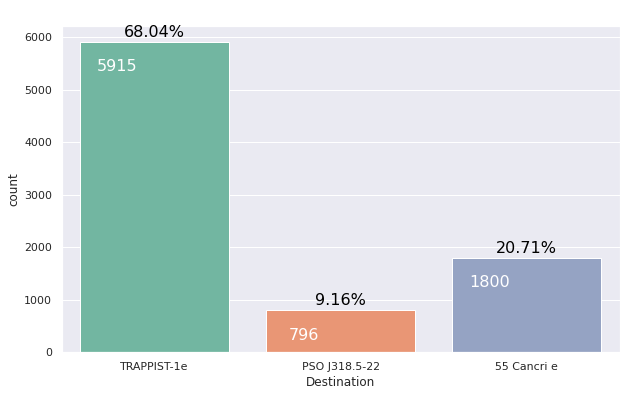

############## Unique Observations of Categorical Data ###############
The unique number of VIP: 2

############## Frequency of Categorical Data ########################
        VIP     Ratio
False  8291  0.953756
True    199  0.022892


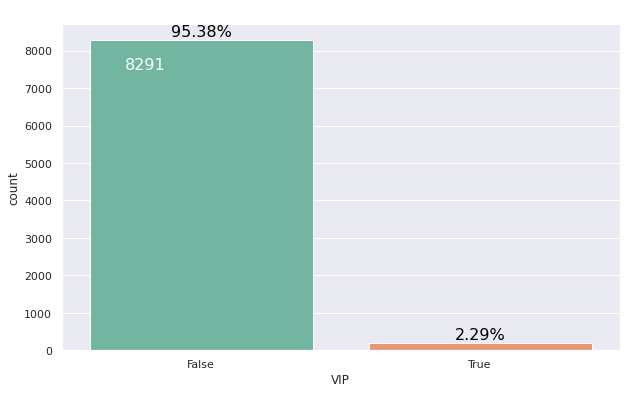

############## Unique Observations of Categorical Data ###############
The unique number of Transported: 2

############## Frequency of Categorical Data ########################
       Transported     Ratio
True          4378  0.503624
False         4315  0.496376


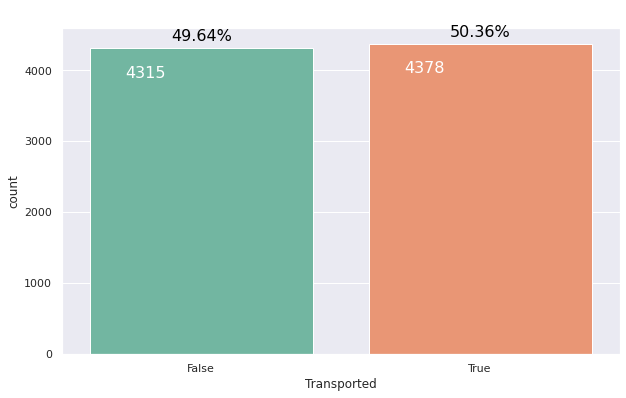

In [10]:
cat_summary(train_org)

## Get to know Numerical Variables

########## Summary Statistics of Age ############
count    8514.000000
mean       28.827930
std        14.489021
min         0.000000
25%        19.000000
50%        27.000000
75%        38.000000
100%       79.000000
max        79.000000
Name: Age, dtype: float64


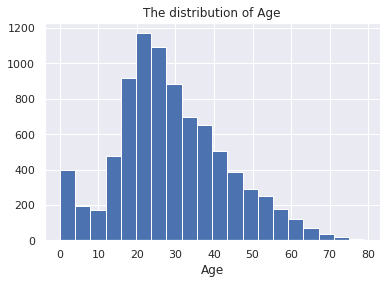

########## Summary Statistics of RoomService ############
count     8512.000000
mean       224.687617
std        666.717663
min          0.000000
25%          0.000000
50%          0.000000
75%         47.000000
100%     14327.000000
max      14327.000000
Name: RoomService, dtype: float64


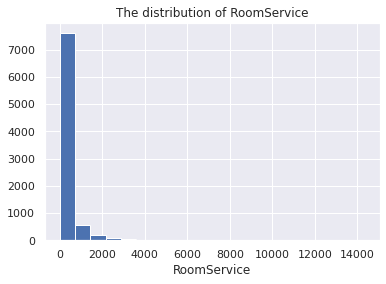

########## Summary Statistics of FoodCourt ############
count     8510.000000
mean       458.077203
std       1611.489240
min          0.000000
25%          0.000000
50%          0.000000
75%         76.000000
100%     29813.000000
max      29813.000000
Name: FoodCourt, dtype: float64


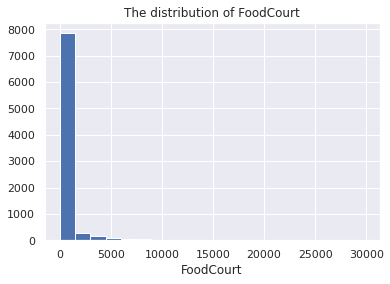

########## Summary Statistics of ShoppingMall ############
count     8485.000000
mean       173.729169
std        604.696458
min          0.000000
25%          0.000000
50%          0.000000
75%         27.000000
100%     23492.000000
max      23492.000000
Name: ShoppingMall, dtype: float64


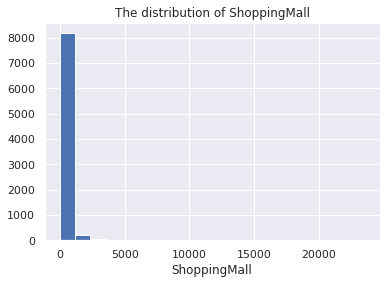

########## Summary Statistics of Spa ############
count     8510.000000
mean       311.138778
std       1136.705535
min          0.000000
25%          0.000000
50%          0.000000
75%         59.000000
100%     22408.000000
max      22408.000000
Name: Spa, dtype: float64


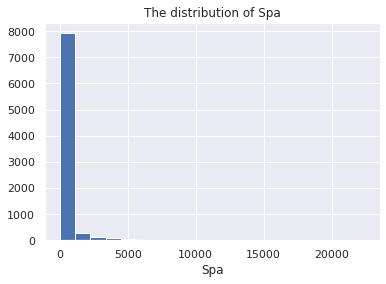

########## Summary Statistics of VRDeck ############
count     8505.000000
mean       304.854791
std       1145.717189
min          0.000000
25%          0.000000
50%          0.000000
75%         46.000000
100%     24133.000000
max      24133.000000
Name: VRDeck, dtype: float64


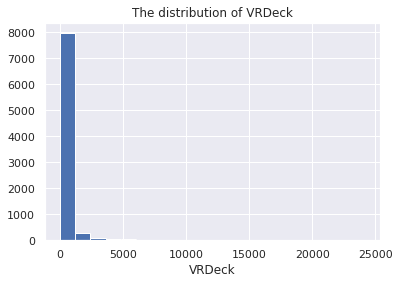

In [11]:
def num_summary(dataframe, plot=False):
    quantiles = [0.25, 0.50, 0.75, 1]
    for col in num_cols:
      print("########## Summary Statistics of " +  col + " ############")
      print(dataframe[col].describe(quantiles).T)
      if plot:
          dataframe[col].hist(bins=20)
          plt.xlabel(col)
          plt.title("The distribution of "+ col)
          plt.show()
        
        
num_summary(train_org, plot=True)

## Target Variable Investigation

In [12]:
def target_summary_with_cat(dataframe, target, categorical_col, target_type="num"):
    if target_type == "num":
        print(pd.DataFrame({"TARGET_MEAN": dataframe.groupby(
            categorical_col)[target].mean()}), end="\n\n\n")
    else:
        print(pd.DataFrame({categorical_col + "_COUNT": dataframe.groupby(categorical_col)[target].count()}),
              end="\n\n\n")   


for col in cat_cols:
    target_summary_with_cat(train_org, "Transported", col)

            TARGET_MEAN
HomePlanet             
Earth          0.423946
Europa         0.658846
Mars           0.523024


           TARGET_MEAN
CryoSleep             
False         0.328921
True          0.817583


               TARGET_MEAN
Destination               
55 Cancri e       0.610000
PSO J318.5-22     0.503769
TRAPPIST-1e       0.471175


       TARGET_MEAN
VIP               
False     0.506332
True      0.381910


             TARGET_MEAN
Transported             
False                0.0
True                 1.0




## Correlation Matrix

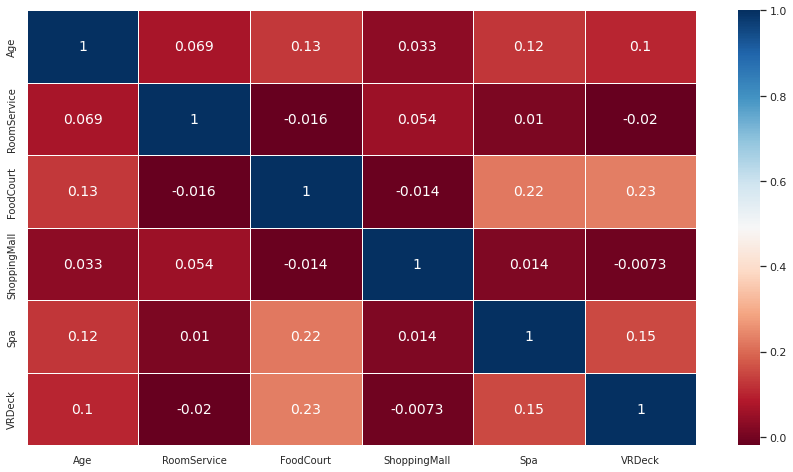

In [13]:
def correlation_matrix(dataframe, cols):
    fig = plt.gcf()
    fig.set_size_inches(15, 8)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    fig = sns.heatmap(dataframe[cols].corr(), annot=True, linewidths=0.5, annot_kws={'size': 14}, linecolor='w',
                      cmap='RdBu')
    plt.show(block=True)
    
    
correlation_matrix(train_org, num_cols)  

## Preprocessing

## Handle Missing Values

In [14]:
# Impute missing values
simple_imputer = SimpleImputer(strategy='most_frequent')
knn_imputer = KNNImputer()
def imputer(data):
    """
    Impute missing values
    
    data = dataframe
    cat_cols = categorical columns as list 
    num_cols = numerical columns as list
    """
    cat_cols, num_cols, cat_but_car = grab_col_names(data)
    data[cat_cols+cat_but_car] = simple_imputer.fit_transform(data[cat_cols+cat_but_car])
    data[num_cols] = knn_imputer.fit_transform(data[num_cols])
    return data
train = imputer(train_org)
test = imputer(test_org)
print(f"Total missing values in train and test data {train.isna().sum().sum()+test.isna().sum().sum()}")

Total missing values in train and test data 0


In [15]:
# Create Passengerid Seperation
def passengerid_sep(dataframe):
    """
    Split Passengerid to "family_id" & "within_group_rank" & "family_member_count"
    """
    #Create empty lists for new columns
    family_id = []
    within_group_rank = []

    # Loop through PassengerId
    for i in dataframe.index:
            family_id.append(np.int16(i[0:4]))
            within_group_rank.append(np.int16(i[-2:]))

    # Create "family_id" & "within_group_rank" column
    dataframe["family_id"] = family_id  # id of family
    dataframe["within_group_rank"] = within_group_rank # if there is inner family rank of passenger

    # Create "family_member_count" column
    family_member_no_map = dataframe.groupby("family_id")["within_group_rank"].max().to_dict() 
    dataframe["family_member_count"] = dataframe["family_id"].map(family_member_no_map)# number of family members
    #dataframe = dataframe.drop(columns=["PassengerId"])
    return dataframe
train = passengerid_sep(train)
test = passengerid_sep(test)
display(train.head(3), test.head(3))

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,family_id,within_group_rank,family_member_count
PassengerId,,,,,,,,,,,,,,,,
0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,1,1,1
0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,2,1,1
0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,3,1,2


,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,family_id,within_group_rank,family_member_count
PassengerId,,,,,,,,,,,,,,,
0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,13,1,1
0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,18,1,1
0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,19,1,1


In [16]:
# Create Cabin seperation function
def cabin_separation(dataframe):
    '''
    Split the Cabin name into Deck, Number and Side
    
    '''
    
    dataframe['CabinDeck'] = dataframe['Cabin'].str.split('/', expand=True)[0]
    dataframe['CabinNum']  = dataframe['Cabin'].str.split('/', expand=True)[1].apply(lambda x: float(x)).apply(lambda x: int(x))
    dataframe['CabinSide'] = dataframe['Cabin'].str.split('/', expand=True)[2]
    
    dataframe["CabinDeck"]=dataframe["CabinDeck"].astype("category")
    dataframe["CabinSide"]=dataframe["CabinSide"].astype("category")
    
    dataframe.drop(columns = ['Cabin', "Name"], inplace = True)
    
    return dataframe
train = cabin_separation(train)
test = cabin_separation(test)
display(train.head(3), test.head(3))

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,family_id,within_group_rank,family_member_count,CabinDeck,CabinNum,CabinSide
PassengerId,,,,,,,,,,,,,,,,,
0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,1,1,1,B,0,P
0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,2,1,1,F,0,S
0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,3,1,2,A,0,S


,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,family_id,within_group_rank,family_member_count,CabinDeck,CabinNum,CabinSide
PassengerId,,,,,,,,,,,,,,,,
0013_01,Earth,True,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,13,1,1,G,3,S
0018_01,Earth,False,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,18,1,1,F,4,S
0019_01,Europa,True,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,19,1,1,C,0,S


In [17]:
# Apply OrdinalEncoder to categorical columns
ordinal_enc = OrdinalEncoder()
cat_cols, num_cols, cat_but_car = grab_col_names(train)
train[cat_cols] = train[cat_cols].astype("category")
train[cat_cols] = ordinal_enc.fit_transform(train[cat_cols])

cat_cols, num_cols, cat_but_car = grab_col_names(test)
test[cat_cols] = test[cat_cols].astype("category")
test[cat_cols] = ordinal_enc.fit_transform(test[cat_cols])

# Add Some more features
total_spent = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

#Sum
train['SumSpends'] = train[total_spent].sum(axis=1)
test['SumSpends'] = test[total_spent].sum(axis=1)
#Max
train["MaxSpends"] = train[total_spent].max(axis=1)
test["MaxSpends"] = test[total_spent].max(axis=1)
#log
train["logSpends"] = np.log(train["SumSpends"]+1)
test["logSpends"] = np.log(test["SumSpends"]+1)


# Apply MinMaxScaler to num_cols
minmax = MinMaxScaler()
cat_cols, num_cols, cat_but_car = grab_col_names(train)
train[num_cols] = minmax.fit_transform(train[num_cols])
cat_cols, num_cols, cat_but_car = grab_col_names(test)
test[num_cols] = minmax.fit_transform(test[num_cols])

In [18]:
# Assumption if someone spending money on spaceship he/she cant be in CryoSleep 
train.loc[train[(train["SumSpends"]>0)&(train["CryoSleep"]==0) ].index,"CryoSleep"] = 1
test.loc[test[(test["SumSpends"]>0)&(test["CryoSleep"]==0) ].index,"CryoSleep"] = 1

In [19]:
# lets fit some ML models
X = train.drop(["Transported"], axis=1)
y = train["Transported"]

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
results_df = pd.DataFrame()
def base_models(X, y, scoring="accuracy"):
    print("Base Models....")
    classifiers = [('LR', LogisticRegression()),
                   ('KNN', KNeighborsClassifier()),
                   ("CART", DecisionTreeClassifier()),
                   ("RF", RandomForestClassifier()),
                   ('Adaboost', AdaBoostClassifier()),
                   ('GBM', GradientBoostingClassifier()),
                   ('XGBoost', XGBClassifier(use_label_encoder=False, eval_metric='logloss')),
                   ('LightGBM', LGBMClassifier())
                   ]
    

    for name, classifier in classifiers:
        cv_results = cross_validate(classifier, X, y, cv=3, scoring=scoring)
        print(f"{scoring}: {round(cv_results['test_score'].mean(), 4)} ({name}) ")

#base_models(X, y, scoring="accuracy")

In [20]:
# Optimization
knn_params = { 'n_neighbors' : [2,5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

rf_params = {   'n_estimators': [5,20,50,100], # number of trees in the random forest
                'max_features': ['auto', 'sqrt'],# number of features in consideration at every split
                'min_samples_split':  [2, 6, 10], # minimum sample number to split a node
                'min_samples_leaf': [1, 3, 4],# minimum sample number that can be stored in a leaf node
                
            }

xgb_parameters = {'gamma' : [0,1],
                'learning_rate': [0.1,0.3],
                'max_depth': [3,6],
                'n_estimators': [50,100],
                'subsample': [0.5, 0.8, 1],
                'min_child_weight': [1, 5, 10],
                'colsample_bytree': [0.6, 0.8, 1.0]}

lgbm_parameters = {'learning_rate': [0.01], 
                   'n_estimators': [8, 24],
                   'num_leaves': [6, 8, 12, 16], 
                   'boosting_type': ['gbdt'], 
                   'objective': ['binary'], 
                   'seed': [500],
                   'colsample_bytree': [0.65, 0.75, 0.8], 
                   'subsample': [0.7, 0.75], 
                   'reg_alpha': [1, 2, 6],
                   'reg_lambda': [1, 2, 6]}

gbm_parameters = {"learning_rate" : [0.05,0.1],
                  "n_estimators": [50,100],
                  "min_samples_split": [2,5],
                  "min_samples_leaf":[1,5],
                  "max_depth": [1,3]}

classifiers = [('KNN', KNeighborsClassifier(), knn_params),
               ("RF", RandomForestClassifier(), rf_params),
               ('LightGBM', LGBMClassifier(), lgbm_parameters),
               ('GBM', GradientBoostingClassifier(), gbm_parameters),
               ('XGBoost', XGBClassifier(), xgb_parameters)
              ]

def hyperparameter_optimization(X, y, cv=10, scoring="accuracy"):
    print("Hyperparameter Optimization....")
    best_models = {}
    for name, classifier, params in classifiers:
        print(f"########## {name} ##########")
        cv_results = cross_validate(classifier, X, y, cv=cv, scoring=scoring)
        print(f"{scoring} (Before): {round(cv_results['test_score'].mean(), 4)}")

        gs_best = GridSearchCV(classifier, params, cv=cv, n_jobs=-1, verbose=False).fit(X, y)
        final_model = classifier.set_params(**gs_best.best_params_)

        cv_results = cross_validate(final_model, X, y, cv=cv, scoring=scoring)
        print(f"{scoring} (After): {round(cv_results['test_score'].mean(), 4)}")
        print(f"{name} best params: {gs_best.best_params_}", end="\n\n")
        best_models[name] = final_model
    return best_models

#best_models = hyperparameter_optimization(X, y, scoring="accuracy")

In [21]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
import tensorflow as tf
def nn_clf():
    # Architecture
    clf = tf.keras.models.Sequential([
        tf.keras.layers.Dense(512, input_shape=([X.shape[1],]), activation = "relu"),
        tf.keras.layers.Dense(256, activation = "relu"),
        tf.keras.layers.Dense(128, activation = "relu"),
        tf.keras.layers.Dense(64, activation = "relu"),
        tf.keras.layers.Dense(32, activation = "relu"),
        tf.keras.layers.Dense(1, activation = "sigmoid" )
    ])
    # Compile
    clf.compile(loss="binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])
    return clf

clf = KerasClassifier(nn_clf, epochs = 100, batch_size = 8, verbose = 1)

In [22]:
# Build Neural Network via KerasClassifier
import tensorflow as tf
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

# Hyperparameters
l2_reg = 0.0000001
dropout = 0.3
learn_rate = 0.01
lr_decay_gamma = 0.975
n_epochs = 200
batchsize = 512
num_input_features = X.shape[1]

def nn_clf():
    # Architecture
    clf = tf.keras.models.Sequential([
    tf.keras.layers.Dense(2*num_input_features, input_shape=[num_input_features], kernel_regularizer=tf.keras.regularizers.L2(l2_reg)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dropout(dropout),
    tf.keras.layers.Dense(2*num_input_features, kernel_regularizer=tf.keras.regularizers.L2(l2_reg)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dropout(dropout),
    tf.keras.layers.Dense(2*num_input_features, kernel_regularizer=tf.keras.regularizers.L2(l2_reg)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    num_samples = X.shape[0]
    itersPerEpoch = (num_samples//batchsize)
    sch = tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate=learn_rate, decay_steps=itersPerEpoch, decay_rate=lr_decay_gamma)
    lr = sch
    # Compile
    clf.compile(loss="binary_crossentropy", optimizer = tf.keras.optimizers.Adam(learning_rate=lr), metrics = ["accuracy"])
    return clf

clf = KerasClassifier(nn_clf, epochs = n_epochs, batch_size = batchsize, verbose = 1)


In [23]:
# Other Models Prediction

def base_models(X, y):
    print("Base Models....")
    classifiers = [('LR', LogisticRegression()),
                   ('KNN', KNeighborsClassifier(metric='manhattan', n_neighbors=15)),
                   ("CART", DecisionTreeClassifier()),
                   ("RF", RandomForestClassifier(max_features='sqrt', min_samples_leaf=4,min_samples_split=10, n_estimators=20)),
                   ('Adaboost', AdaBoostClassifier()),
                   ('GBM', GradientBoostingClassifier(learning_rate=0.05, n_estimators=50)),
                   ('XGBoost', XGBClassifier(min_child_weight=5,n_estimators=50,learning_rate=0.1, use_label_encoder=False, eval_metric='logloss', colsample_bytree=0.8,)),
                   ('LightGBM', LGBMClassifier(colsample_bytree=0.65, learning_rate=0.01,max_depth=3, n_estimators=8, num_leaves=12, objective='binary', reg_alpha=6, reg_lambda=1,seed=500, subsample=0.7)),
                   ('NeuralNet', clf)
                   ]
    

    for name, classifier in classifiers:
        if classifier != clf: 
            classifier.fit(X, y)
            current_preds = classifier.predict(test)
            results_df[f"{name}"] = current_preds
        else:
            classifier.fit(X, y)
            current_preds = (classifier.predict(test) > 0.5).astype("int")  
            results_df[f"{name}"] = current_preds
            
        

base_models(X, y)

Base Models....


2022-11-24 09:07:39.583593: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
2022-11-24 09:07:40.036450: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/200
17/17 [==============================] - 2s 7ms/step - loss: 0.6397 - accuracy: 0.6452
Epoch 2/200
17/17 [==============================] - 0s 7ms/step - loss: 0.5537 - accuracy: 0.7243
Epoch 3/200
17/17 [==============================] - 0s 6ms/step - loss: 0.5262 - accuracy: 0.7370
Epoch 4/200
17/17 [==============================] - 0s 6ms/step - loss: 0.4984 - accuracy: 0.7505
Epoch 5/200
17/17 [==============================] - 0s 6ms/step - loss: 0.4804 - accuracy: 0.7589
Epoch 6/200
17/17 [==============================] - 0s 6ms/step - loss: 0.4649 - accuracy: 0.7737
Epoch 7/200
17/17 [==============================] - 0s 6ms/step - loss: 0.4595 - accuracy: 0.7794
Epoch 8/200
17/17 [==============================] - 0s 6ms/step - loss: 0.4560 - accuracy: 0.7796
Epoch 9/200
17/17 [==============================] - 0s 7ms/step - loss: 0.4533 - accuracy: 0.7852
Epoch 10/200
17/17 [==============================] - 0s 6ms/step - loss: 0.4491 - accuracy: 0.7845
Epoch 11/

In [24]:
# Ensemble Results
results_df["Ensemble"] = (1/12* results_df["LR"] + 1/12 * results_df["KNN"] + 1/12 * results_df["CART"] + 
                          1/16 * results_df["Adaboost"] + 1/16 * results_df["GBM"] + 1/16 * results_df["XGBoost"] + 1/16 * results_df["LightGBM"] + 
                          1/2 * results_df["NeuralNet"]) > 0.5
results_df

,LR,KNN,CART,RF,Adaboost,GBM,XGBoost,LightGBM,NeuralNet,Ensemble
0,1.0,0.0,0.0,1.0,1.0,1.0,1,1.0,1,True
1,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,False
2,1.0,1.0,1.0,1.0,1.0,1.0,1,1.0,1,True
3,1.0,1.0,0.0,1.0,1.0,1.0,1,0.0,1,True
4,0.0,0.0,0.0,1.0,1.0,1.0,1,0.0,1,True
...,...,...,...,...,...,...,...,...,...,...
4272,1.0,1.0,1.0,1.0,1.0,1.0,1,1.0,1,True
4273,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,False
4274,1.0,1.0,1.0,1.0,1.0,1.0,1,1.0,1,True
4275,0.0,0.0,1.0,1.0,1.0,1.0,1,0.0,1,True


In [25]:
results = pd.DataFrame()
results["PassengerId"] = test_org.index
results["Transported"] = results_df["Ensemble"] > 0.5
#results["Transported"] = results["Transported"].astype("bool")
results.to_csv("submission.csv",index=False)
results.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
